In [1]:
# Import packages
import numpy as np
import time 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
#import math
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

In [2]:
import datetime
from datetime import datetime
from datetime import timedelta

Prerequisites: pip install keras (similarly tensorflow, xgboost, etc.) from  prompt (anaconda in my case)

In [3]:
#used as temporary solution - if there's time must fill missing values in a more meaningful way
df = pd.read_csv('data.csv').fillna(method='ffill')


#  drop dups
df.drop_duplicates(keep=False,inplace=True) 
df.head(15)

,Date,P,D,E,CPI,Fraction,GS10,Price,Dividend,Earnings
0,"1871,01","4,44","0,26","0,40","12,46","1871,04","5,32","91,37","5,35","8,23"
1,"1871,02","4,50","0,26","0,40","12,84","1871,13","5,32","89,86","5,19","7,99"
2,"1871,03","4,61","0,26","0,40","13,03","1871,21","5,33","90,71","5,12","7,87"
3,"1871,04","4,74","0,26","0,40","12,56","1871,29","5,33","96,81","5,31","8,17"
4,"1871,05","4,86","0,26","0,40","12,27","1871,37","5,33","101,57","5,43","8,36"
5,"1871,06","4,82","0,26","0,40","12,08","1871,46","5,34","102,32","5,52","8,49"
6,"1871,07","4,73","0,26","0,40","12,08","1871,54","5,34","100,41","5,52","8,49"
7,"1871,08","4,79","0,26","0,40","11,89","1871,62","5,34","103,31","5,61","8,63"
8,"1871,09","4,84","0,26","0,40","12,18","1871,71","5,35","101,94","5,48","8,42"
9,"1871,1","4,59","0,26","0,40","12,37","1871,79","5,35","95,19","5,39","8,30"


In [4]:
#df.info()

In [5]:
def parse_date(date):
    year, month = date.split(",", maxsplit=1)
    if month == "1":
        month = "10"
    return datetime(int(year), int(month), 1)

In [6]:
# dropping Fractions column as the initial research shown it is not adding much value
# e.g. https://datahub.io/core/s-and-p-500
df.drop("Fraction", axis=1, inplace=True)

In [7]:
df['Date'] = df['Date'].apply(parse_date)

In [8]:
df.head(25)

,Date,P,D,E,CPI,GS10,Price,Dividend,Earnings
0,1871-01-01,"4,44","0,26","0,40","12,46","5,32","91,37","5,35","8,23"
1,1871-02-01,"4,50","0,26","0,40","12,84","5,32","89,86","5,19","7,99"
2,1871-03-01,"4,61","0,26","0,40","13,03","5,33","90,71","5,12","7,87"
3,1871-04-01,"4,74","0,26","0,40","12,56","5,33","96,81","5,31","8,17"
4,1871-05-01,"4,86","0,26","0,40","12,27","5,33","101,57","5,43","8,36"
5,1871-06-01,"4,82","0,26","0,40","12,08","5,34","102,32","5,52","8,49"
6,1871-07-01,"4,73","0,26","0,40","12,08","5,34","100,41","5,52","8,49"
7,1871-08-01,"4,79","0,26","0,40","11,89","5,34","103,31","5,61","8,63"
8,1871-09-01,"4,84","0,26","0,40","12,18","5,35","101,94","5,48","8,42"
9,1871-10-01,"4,59","0,26","0,40","12,37","5,35","95,19","5,39","8,30"


In [9]:
df = df.set_index('Date')

In [10]:
# those are dtype (str) type of objects and need to be converted
df['P'].apply(type).value_counts()

<class 'str'>    1783
Name: P, dtype: int64

In [11]:
# defining auxiliary cleaning function
def clean_column(x):
    """ the values are str objects containing ',' those have been replaced with '.'
    """
    if isinstance(x, str):
        return(x.replace(',', '.'))
    return(x)

In [12]:
#df['P'] = df['P'].apply(clean_column).astype('float')
cols = df.columns[df.dtypes.eq('object')]
cols

Index(['P', 'D', 'E', 'CPI', 'GS10', 'Price', 'Dividend', 'Earnings'], dtype='object')

In [13]:
#selecting all 'object' type of columns in one shot
# there might be even shorter way - skipping for loop - investigate later if time permits
cols = df.columns[df.dtypes.eq('object')]

for column in cols:
    df[column] = df[column].apply(clean_column).astype('float')

In [14]:
df.head(10)

,P,D,E,CPI,GS10,Price,Dividend,Earnings
Date,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,91.37,5.35,8.23
1871-02-01,4.50,0.26,0.4,12.84,5.32,89.86,5.19,7.99
1871-03-01,4.61,0.26,0.4,13.03,5.33,90.71,5.12,7.87
1871-04-01,4.74,0.26,0.4,12.56,5.33,96.81,5.31,8.17
1871-05-01,4.86,0.26,0.4,12.27,5.33,101.57,5.43,8.36
1871-06-01,4.82,0.26,0.4,12.08,5.34,102.32,5.52,8.49
1871-07-01,4.73,0.26,0.4,12.08,5.34,100.41,5.52,8.49
1871-08-01,4.79,0.26,0.4,11.89,5.34,103.31,5.61,8.63
1871-09-01,4.84,0.26,0.4,12.18,5.35,101.94,5.48,8.42


### rephrase: 
we should normalize tha data and draw autocorrelatin on log returns 
while looking up for patterns .
Log returns are considered a standard transforamtional practice

In [15]:
# we used conversion to Series to facilitate out operations
# nice outline for reference: https://www.geeksforgeeks.org/python-pandas-series/
df['pct_change'] = df['P'].pct_change().fillna(method='bfill')
df['log_ret_1_mth'] = np.log(df['P'] / df['P'].shift(1)).fillna(method='bfill')

df['Log_Ret_2_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=2).sum()
df['Log_Ret_3_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=3).sum()
df['Log_Ret_4_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=4).sum()
df['Log_Ret_8_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=8).sum()
df['Log_Ret_12_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=12).sum()
df['Log_Ret_48_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=48).sum()


In [16]:
# for monthly to annualized vol. (which is normally used) 
#we multiply the right side by sqrt(12) https://breakingdownfinance.com/finance-topics/finance-basics/annualize-volatility/
# note: ddof Means Delta Degrees of Freedom. The divisor used in calculations is (N- ddof), where N=len(Series) represents the number of elements
#df['volat_1_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(1).std(ddof=0)*np.sqrt(12)
df['volat_2_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(2).std(ddof=0)*np.sqrt(12)
df['volat_3_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(3).std(ddof=0)*np.sqrt(12)
df['volat_4_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(4).std(ddof=0)*np.sqrt(12)
df['volat_8_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(8).std(ddof=0)*np.sqrt(12)
df['volat_12_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(12).std(ddof=0)*np.sqrt(12)
df['volat_48_mth']=pd.Series(df['log_ret_1_mth'].pct_change()).rolling(48).std(ddof=0)*np.sqrt(12)


In [17]:
df = df.fillna(method='bfill')

In [18]:
# Label data: Up (Down) if the the 1 month logarithmic return increased (decreased)
# shift index axis by a period in negative direction 
 
df['dir']=np.where(df['log_ret_1_mth'] > 0, 1, 0)

In [19]:
df.head()

,P,D,E,CPI,GS10,Price,Dividend,Earnings,pct_change,log_ret_1_mth,...,Log_Ret_12_mth,Log_Ret_48_mth,volat_1_mth,volat_2_mth,volat_3_mth,volat_4_mth,volat_8_mth,volat_12_mth,volat_48_mth,dir
Date,,,,,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,91.37,5.35,8.23,0.013514,0.013423,...,0.078806,0.035696,0.0,1.384224,1.200631,1.21409,3.184724,6.501847,16.478317,1
1871-02-01,4.50,0.26,0.4,12.84,5.32,89.86,5.19,7.99,0.013514,0.013423,...,0.078806,0.035696,0.0,1.384224,1.200631,1.21409,3.184724,6.501847,16.478317,1
1871-03-01,4.61,0.26,0.4,13.03,5.33,90.71,5.12,7.87,0.024444,0.024150,...,0.078806,0.035696,0.0,1.384224,1.200631,1.21409,3.184724,6.501847,16.478317,1
1871-04-01,4.74,0.26,0.4,12.56,5.33,96.81,5.31,8.17,0.028200,0.027809,...,0.078806,0.035696,0.0,1.121817,1.200631,1.21409,3.184724,6.501847,16.478317,1
1871-05-01,4.86,0.26,0.4,12.27,5.33,101.57,5.43,8.36,0.025316,0.025001,...,0.078806,0.035696,0.0,0.437297,1.313272,1.21409,3.184724,6.501847,16.478317,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1783 entries, 1871-01-01 to 2019-07-01
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P               1783 non-null   float64
 1   D               1783 non-null   float64
 2   E               1783 non-null   float64
 3   CPI             1783 non-null   float64
 4   GS10            1783 non-null   float64
 5   Price           1783 non-null   float64
 6   Dividend        1783 non-null   float64
 7   Earnings        1783 non-null   float64
 8   pct_change      1783 non-null   float64
 9   log_ret_1_mth   1783 non-null   float64
 10  Log_Ret_2_mth   1783 non-null   float64
 11  Log_Ret_3_mth   1783 non-null   float64
 12  Log_Ret_4_mth   1783 non-null   float64
 13  Log_Ret_8_mth   1783 non-null   float64
 14  Log_Ret_12_mth  1783 non-null   float64
 15  Log_Ret_48_mth  1783 non-null   float64
 16  volat_1_mth     1783 non-null   float64
 17  volat_2_mth    

In [21]:
# list rows and columns
print("Rows, Columns:")
print(df.shape)

# list columns
print("Columns:")
print(df.columns)

Rows, Columns:
(1783, 24)
Columns:
Index(['P', 'D', 'E', 'CPI', 'GS10', 'Price', 'Dividend', 'Earnings',
       'pct_change', 'log_ret_1_mth', 'Log_Ret_2_mth', 'Log_Ret_3_mth',
       'Log_Ret_4_mth', 'Log_Ret_8_mth', 'Log_Ret_12_mth', 'Log_Ret_48_mth',
       'volat_1_mth', 'volat_2_mth', 'volat_3_mth', 'volat_4_mth',
       'volat_8_mth', 'volat_12_mth', 'volat_48_mth', 'dir'],
      dtype='object')


The comparison above was to make an assumption that plain vanilla LSTM might outperform baseline models like ARIMA in some circumstances.
However, to date there is no reliable technique exists that would predict exact future prices. Instead, researchers in this domain are working on problems like those of predicting market movement direction, market regime switch, exponential bubble-like behaviour etc.
Let's take one step further and implement multivariate LSTM with different features in attempt to find likely market move direction. Examples of such work could be found bot not limited to Chen et. al. (2015), [7]


#### LSTM with multiple features

In [22]:
# sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yahoo_fin import stock_info as si

from collections import deque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import random

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [24]:

# dropping justified by high intercorrelation of Price and Aggregate Price, Earnings vs Aggregate Earnings, etc.
df=df.drop(['Price','Dividend','Earnings'], axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1783 entries, 1871-01-01 to 2019-07-01
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P               1783 non-null   float64
 1   D               1783 non-null   float64
 2   E               1783 non-null   float64
 3   CPI             1783 non-null   float64
 4   GS10            1783 non-null   float64
 5   pct_change      1783 non-null   float64
 6   log_ret_1_mth   1783 non-null   float64
 7   Log_Ret_2_mth   1783 non-null   float64
 8   Log_Ret_3_mth   1783 non-null   float64
 9   Log_Ret_4_mth   1783 non-null   float64
 10  Log_Ret_8_mth   1783 non-null   float64
 11  Log_Ret_12_mth  1783 non-null   float64
 12  Log_Ret_48_mth  1783 non-null   float64
 13  volat_1_mth     1783 non-null   float64
 14  volat_2_mth     1783 non-null   float64
 15  volat_3_mth     1783 non-null   float64
 16  volat_4_mth     1783 non-null   float64
 17  volat_8_mth    

We'll adapt a code to build a relatively simple LSTM model from [1]

In [26]:
np.random.seed(314)
tf.random.set_seed(314)
random.seed(314)

In [27]:
def load_data(n_steps=50, scale=True, shuffle=True, lookup_step=1, 
                test_size=0.2, feature_columns=['P', 'D', 'E', 'CPI', 'GS10', 'pct_change', 'log_ret_1_mth']):
    result = {}
    result['df'] = df.copy()
    # make sure that the passed feature_columns exist in the dataframe
    for col in feature_columns:
        assert col in df.columns, f"'{col}' does not exist in the dataframe."
    if scale:
        column_scaler = {}
        # scale the data (prices) from 0 to 1
        for column in feature_columns:
            scaler = preprocessing.MinMaxScaler()
            df[column] = scaler.fit_transform(np.expand_dims(df[column].values, axis=1))
            column_scaler[column] = scaler

        # add the MinMaxScaler instances to the result returned
        result["column_scaler"] = column_scaler
    # add the target column (label) by shifting by `lookup_step`
    df['future'] = df['P'].shift(-lookup_step)
    # last `lookup_step` columns contains NaN in future column
    # get them before droping NaNs
    last_sequence = np.array(df[feature_columns].tail(lookup_step))
    # drop NaNs
    df.dropna(inplace=True)
    sequence_data = []
    sequences = deque(maxlen=n_steps)
    for entry, target in zip(df[feature_columns].values, df['future'].values):
        sequences.append(entry)
        if len(sequences) == n_steps:
            sequence_data.append([np.array(sequences), target])
    # get the last sequence by appending the last `n_step` sequence with `lookup_step` sequence
    # for instance, if n_steps=50 and lookup_step=10, last_sequence should be of 59 (that is 50+10-1) length
    # this last_sequence will be used to predict in future dates that are not available in the dataset
    last_sequence = list(sequences) + list(last_sequence)
    # shift the last sequence by -1
    last_sequence = np.array(pd.DataFrame(last_sequence).shift(-1).dropna())
    # add to result
    result['last_sequence'] = last_sequence
    # construct the X's and y's
    X, y = [], []
    for seq, target in sequence_data:
        X.append(seq)
        y.append(target)
    # convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    # reshape X to fit the neural network
    X = X.reshape((X.shape[0], X.shape[2], X.shape[1]))
    # split the dataset
    result["X_train"], result["X_test"], result["y_train"], result["y_test"] = train_test_split(X, y, test_size=test_size, shuffle=shuffle)
    # return the result
    return result

In [28]:
def create_model(sequence_length, units=256, cell=LSTM, n_layers=2, dropout=0.3,
                loss="mean_absolute_error", optimizer="rmsprop", bidirectional=False):
    model = Sequential()
    for i in range(n_layers):
        if i == 0:
            # first layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True), input_shape=(None, sequence_length)))
            else:
                model.add(cell(units, return_sequences=True, input_shape=(None, sequence_length)))
        elif i == n_layers - 1:
            # last layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=False)))
            else:
                model.add(cell(units, return_sequences=False))
        else:
            # hidden layers
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True)))
            else:
                model.add(cell(units, return_sequences=True))
        # add dropout after each layer
        model.add(Dropout(dropout))
    model.add(Dense(1, activation="linear"))
    model.compile(loss=loss, metrics=["mean_absolute_error"], optimizer=optimizer)
    return model

In [29]:
# Window size or the sequence length
N_STEPS = 100
# Lookup step, 1 is the next day
LOOKUP_STEP = 1
# test ratio size, 0.2 is 20%
TEST_SIZE = 0.2
# features to use
FEATURE_COLUMNS = ['P', 'D', 'E', 'CPI', 'GS10', 'pct_change', 'log_ret_1_mth']
# date now
date_now = time.strftime("%Y-%m-%d")
### model parameters
N_LAYERS = 3
# LSTM cell
CELL = LSTM
# 256 LSTM neurons
UNITS = 256
# 40% dropout
DROPOUT = 0.4
# whether to use bidirectional RNNs
BIDIRECTIONAL = False
### training parameters
# mean absolute error loss
# LOSS = "mae"
# huber loss
LOSS = "huber_loss"
OPTIMIZER = "adam"
BATCH_SIZE = 64
EPOCHS = 200
# Apple stock market
ticker = "AAPL"
ticker_data_filename = os.path.join("data", f"{ticker}_{date_now}.csv")
# model name to save, making it as unique as possible based on parameters
model_name = f"{date_now}_{ticker}-{LOSS}-{OPTIMIZER}-{CELL.__name__}-seq-{N_STEPS}-step-{LOOKUP_STEP}-layers-{N_LAYERS}-units-{UNITS}"
if BIDIRECTIONAL:
    model_name += "-b"

In [30]:
# create these folders if they does not exist
if not os.path.isdir("results"):
    os.mkdir("results")
if not os.path.isdir("logs"):
    os.mkdir("logs")
if not os.path.isdir("data"):
    os.mkdir("data")

In [31]:
# load the data
data = load_data(N_STEPS, lookup_step=LOOKUP_STEP, test_size=TEST_SIZE, feature_columns=FEATURE_COLUMNS)


In [32]:
# save the dataframe
data["df"].to_csv(ticker_data_filename)

In [33]:
# construct the model
model = create_model(N_STEPS, loss=LOSS, units=UNITS, cell=CELL, n_layers=N_LAYERS,
                    dropout=DROPOUT, optimizer=OPTIMIZER, bidirectional=BIDIRECTIONAL)


In [34]:
# some tensorflow callbacks
checkpointer = ModelCheckpoint(os.path.join("results", model_name + ".h5"), save_weights_only=True, save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir=os.path.join("logs", model_name))

history = model.fit(data["X_train"], data["y_train"],
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(data["X_test"], data["y_test"]),
                    callbacks=[checkpointer, tensorboard],
                    verbose=1)

model.save(os.path.join("results", model_name) + ".h5")

Epoch 1/200
22/22 [==============================] - ETA: 0s - loss: 0.0080 - mean_absolute_error: 0.0817
Epoch 00001: val_loss improved from inf to 0.00128, saving model to results\2020-06-07_AAPL-huber_loss-adam-LSTM-seq-100-step-1-layers-3-units-256.h5
22/22 [==============================] - 4s 189ms/step - loss: 0.0080 - mean_absolute_error: 0.0817 - val_loss: 0.0013 - val_mean_absolute_error: 0.0314
Epoch 2/200
22/22 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0334
Epoch 00002: val_loss did not improve from 0.00128
22/22 [==============================] - 3s 125ms/step - loss: 0.0017 - mean_absolute_error: 0.0334 - val_loss: 0.0016 - val_mean_absolute_error: 0.0303
Epoch 3/200
22/22 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0320
Epoch 00003: val_loss did not improve from 0.00128
22/22 [==============================] - 3s 125ms/step - loss: 0.0017 - mean_absolute_error: 0.0320 - val_loss: 0.0032 - val

Epoch 50/200
22/22 [==============================] - ETA: 0s - loss: 6.5528e-04 - mean_absolute_error: 0.0227
Epoch 00050: val_loss did not improve from 0.00031
22/22 [==============================] - 3s 136ms/step - loss: 6.5528e-04 - mean_absolute_error: 0.0227 - val_loss: 3.6008e-04 - val_mean_absolute_error: 0.0173
Epoch 51/200
22/22 [==============================] - ETA: 0s - loss: 6.1101e-04 - mean_absolute_error: 0.0202
Epoch 00051: val_loss improved from 0.00031 to 0.00030, saving model to results\2020-06-07_AAPL-huber_loss-adam-LSTM-seq-100-step-1-layers-3-units-256.h5
22/22 [==============================] - 3s 127ms/step - loss: 6.1101e-04 - mean_absolute_error: 0.0202 - val_loss: 3.0401e-04 - val_mean_absolute_error: 0.0147
Epoch 52/200
22/22 [==============================] - ETA: 0s - loss: 5.9425e-04 - mean_absolute_error: 0.0215
Epoch 00052: val_loss did not improve from 0.00030
22/22 [==============================] - 3s 132ms/step - loss: 5.9425e-04 - mean_absolute

Epoch 74/200
22/22 [==============================] - ETA: 0s - loss: 6.7867e-04 - mean_absolute_error: 0.0241
Epoch 00074: val_loss did not improve from 0.00017
22/22 [==============================] - 3s 138ms/step - loss: 6.7867e-04 - mean_absolute_error: 0.0241 - val_loss: 1.9105e-04 - val_mean_absolute_error: 0.0126
Epoch 75/200
22/22 [==============================] - ETA: 0s - loss: 5.2210e-04 - mean_absolute_error: 0.0190
Epoch 00075: val_loss improved from 0.00017 to 0.00016, saving model to results\2020-06-07_AAPL-huber_loss-adam-LSTM-seq-100-step-1-layers-3-units-256.h5
22/22 [==============================] - 3s 127ms/step - loss: 5.2210e-04 - mean_absolute_error: 0.0190 - val_loss: 1.6356e-04 - val_mean_absolute_error: 0.0096
Epoch 76/200
22/22 [==============================] - ETA: 0s - loss: 4.4580e-04 - mean_absolute_error: 0.0177
Epoch 00076: val_loss improved from 0.00016 to 0.00013, saving model to results\2020-06-07_AAPL-huber_loss-adam-LSTM-seq-100-step-1-layers-3

Epoch 99/200
22/22 [==============================] - ETA: 0s - loss: 6.0077e-04 - mean_absolute_error: 0.0214
Epoch 00099: val_loss did not improve from 0.00013
22/22 [==============================] - 3s 138ms/step - loss: 6.0077e-04 - mean_absolute_error: 0.0214 - val_loss: 1.4456e-04 - val_mean_absolute_error: 0.0094
Epoch 100/200
22/22 [==============================] - ETA: 0s - loss: 5.1936e-04 - mean_absolute_error: 0.0201
Epoch 00100: val_loss did not improve from 0.00013
22/22 [==============================] - 3s 144ms/step - loss: 5.1936e-04 - mean_absolute_error: 0.0201 - val_loss: 3.4833e-04 - val_mean_absolute_error: 0.0132
Epoch 101/200
22/22 [==============================] - ETA: 0s - loss: 4.0104e-04 - mean_absolute_error: 0.0191
Epoch 00101: val_loss did not improve from 0.00013
22/22 [==============================] - 3s 132ms/step - loss: 4.0104e-04 - mean_absolute_error: 0.0191 - val_loss: 1.5406e-04 - val_mean_absolute_error: 0.0119
Epoch 102/200
22/22 [========

Epoch 124/200
22/22 [==============================] - ETA: 0s - loss: 3.4905e-04 - mean_absolute_error: 0.0152
Epoch 00124: val_loss did not improve from 0.00008
22/22 [==============================] - 3s 127ms/step - loss: 3.4905e-04 - mean_absolute_error: 0.0152 - val_loss: 1.3920e-04 - val_mean_absolute_error: 0.0110
Epoch 125/200
22/22 [==============================] - ETA: 0s - loss: 2.9363e-04 - mean_absolute_error: 0.0144
Epoch 00125: val_loss did not improve from 0.00008
22/22 [==============================] - 3s 135ms/step - loss: 2.9363e-04 - mean_absolute_error: 0.0144 - val_loss: 8.4121e-05 - val_mean_absolute_error: 0.0069
Epoch 126/200
22/22 [==============================] - ETA: 0s - loss: 3.3710e-04 - mean_absolute_error: 0.0152
Epoch 00126: val_loss did not improve from 0.00008
22/22 [==============================] - 3s 137ms/step - loss: 3.3710e-04 - mean_absolute_error: 0.0152 - val_loss: 1.2010e-04 - val_mean_absolute_error: 0.0092
Epoch 127/200
22/22 [=======

Epoch 149/200
22/22 [==============================] - ETA: 0s - loss: 2.6313e-04 - mean_absolute_error: 0.0146
Epoch 00149: val_loss did not improve from 0.00006
22/22 [==============================] - 3s 126ms/step - loss: 2.6313e-04 - mean_absolute_error: 0.0146 - val_loss: 1.2037e-04 - val_mean_absolute_error: 0.0124
Epoch 150/200
22/22 [==============================] - ETA: 0s - loss: 2.5254e-04 - mean_absolute_error: 0.0140
Epoch 00150: val_loss did not improve from 0.00006
22/22 [==============================] - 3s 127ms/step - loss: 2.5254e-04 - mean_absolute_error: 0.0140 - val_loss: 8.2828e-05 - val_mean_absolute_error: 0.0086
Epoch 151/200
22/22 [==============================] - ETA: 0s - loss: 2.3149e-04 - mean_absolute_error: 0.0134
Epoch 00151: val_loss did not improve from 0.00006
22/22 [==============================] - 3s 133ms/step - loss: 2.3149e-04 - mean_absolute_error: 0.0134 - val_loss: 1.4555e-04 - val_mean_absolute_error: 0.0101
Epoch 152/200
22/22 [=======

22/22 [==============================] - ETA: 0s - loss: 1.6995e-04 - mean_absolute_error: 0.0116
Epoch 00199: val_loss did not improve from 0.00006
22/22 [==============================] - 3s 142ms/step - loss: 1.6995e-04 - mean_absolute_error: 0.0116 - val_loss: 6.3180e-05 - val_mean_absolute_error: 0.0068
Epoch 200/200
22/22 [==============================] - ETA: 0s - loss: 1.8743e-04 - mean_absolute_error: 0.0123
Epoch 00200: val_loss did not improve from 0.00006
22/22 [==============================] - 3s 127ms/step - loss: 1.8743e-04 - mean_absolute_error: 0.0123 - val_loss: 8.9273e-05 - val_mean_absolute_error: 0.0077


In [35]:
data = load_data(N_STEPS, lookup_step=LOOKUP_STEP, test_size=TEST_SIZE,
                feature_columns=FEATURE_COLUMNS, shuffle=False)

In [36]:
# construct the model
model = create_model(N_STEPS, loss=LOSS, units=UNITS, cell=CELL, n_layers=N_LAYERS,
                    dropout=DROPOUT, optimizer=OPTIMIZER, bidirectional=BIDIRECTIONAL)

model_path = os.path.join("results", model_name) + ".h5"
model.load_weights(model_path)

In [37]:
# evaluate the model
mse, mae = model.evaluate(data["X_test"], data["y_test"], verbose=0)
# calculate the mean absolute error (inverse scaling)
mean_absolute_error = data["column_scaler"]["P"].inverse_transform([[mae]])[0][0]
print("Mean Absolute Error:", mean_absolute_error)

Mean Absolute Error: 0.026062198324993985


In [38]:
def predict(model, data, classification=False):
    # retrieve the last sequence from data
    last_sequence = data["last_sequence"][:N_STEPS]
    # retrieve the column scalers
    column_scaler = data["column_scaler"]
    # reshape the last sequence
    last_sequence = last_sequence.reshape((last_sequence.shape[1], last_sequence.shape[0]))
    # expand dimension
    last_sequence = np.expand_dims(last_sequence, axis=0)
    # get the prediction (scaled from 0 to 1)
    prediction = model.predict(last_sequence)
    # get the price (by inverting the scaling)
    predicted_price = column_scaler["P"].inverse_transform(prediction)[0][0]
    return predicted_price


In [39]:
# predict the future price
future_price = predict(model, data)
print(f"Future price after {LOOKUP_STEP} days is {future_price:.2f}$")

Future price after 1 days is 0.92$


In [40]:
def plot_graph(model, data):
    y_test = data["y_test"]
    X_test = data["X_test"]
    y_pred = model.predict(X_test)
    y_test = np.squeeze(data["column_scaler"]["P"].inverse_transform(np.expand_dims(y_test, axis=0)))
    y_pred = np.squeeze(data["column_scaler"]["P"].inverse_transform(y_pred))
    # last 200 days, feel free to edit that
    plt.plot(y_test[-200:], c='b')
    plt.plot(y_pred[-200:], c='r')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()

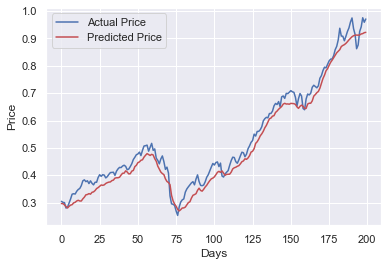

In [41]:
plot_graph(model, data)

Conclusion: simple LSTM seems to provide interesting results in our case. It would be interesting to make the period of 2007-08 a test set and investigate the behaviour on that set

#### References

[1] weblink: https://www.thepythoncode.com/article/stock-price-prediction-in-python-using-tensorflow-2